In [16]:
#install.packages('randomForest')
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('caret')
#library(caret)
library(rpart)
#install.packages('tree')
library(tree)

Installing package into 'C:/Users/hichul/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hichul\AppData\Local\Temp\RtmpOYoFtK\downloaded_packages


Warning message:
"package 'tree' was built under R version 4.0.3"
Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 



# Classification

In [19]:
df.wa = read.csv(file = "../../results/df-water-access.csv")
df.explore = read.csv(file = "../../results/df-water-explore.csv")
df = read.csv(file = "../../results/dfsimple.csv")

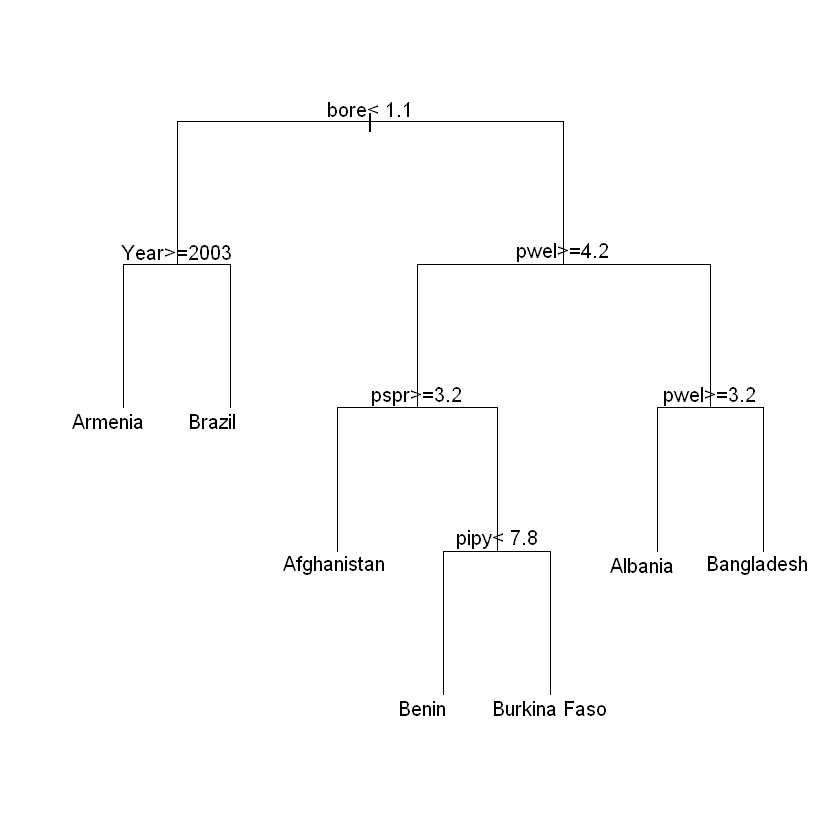

In [20]:
model <- rpart(Country ~., data = df)
par(xpd = NA) # otherwise on some devices the text is clipped
plot(model)
text(model, digits = 3)